## Project : Google Playstore Data Visualization & EDA 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


 If We try to predict Rating, I think App, Current ver, Android Ver are unnecessery cols. So I will delete them.

In [5]:
data = data.drop(["App","Current Ver","Android Ver"],axis=1)

There are NaN values in Rating, Type, Content Rating. We must handle them.

In [6]:
data['Rating'].isnull().sum()

1474

In [7]:
data['Type'].isnull().sum()

1

In [8]:
data['Content Rating'].isnull().sum()

1

In [9]:
data['Rating'].isna().sum()/data.shape[0]*100

13.596531685268886

Missing rates are very low. I think, We can delete specially Type,Content Rating easly.

But, we need check Rating.

In [10]:
#delete Type,Content Rating, Current Ver, Android Ver null values row
df_train = data.copy()
for i in['Type','Content Rating']:
    df_train=df_train.drop(df_train.loc[df_train[i].isnull()].index,0)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10839 non-null  object 
 1   Rating          9366 non-null   float64
 2   Reviews         10839 non-null  object 
 3   Size            10839 non-null  object 
 4   Installs        10839 non-null  object 
 5   Type            10839 non-null  object 
 6   Price           10839 non-null  object 
 7   Content Rating  10839 non-null  object 
 8   Genres          10839 non-null  object 
 9   Last Updated    10839 non-null  object 
dtypes: float64(1), object(9)
memory usage: 931.5+ KB


In [12]:
df_train['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [13]:
#fill rating null values with mean quartiles
x = sum(df_train.Rating.describe()[4:8])/4
df_train['Rating'] = df_train['Rating'].fillna(x)
print('Dataset contains:',df_train.isna().any().sum(),"values")

Dataset contains: 0 values


## Data Transformation 

Rating should not to be up to 5

In [14]:
df_train = df_train[df_train['Rating']<=5]

For machine learning, we need to convert objects to numbers.

## 1. Category 

In [15]:
df_train['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [16]:
# convert to categorical Categority by using one hot tecnique
df_dummy = df_train.copy()
df_dummy['Category'] = pd.Categorical(df_dummy['Category'])

x = df_dummy['Category']
del df_dummy['Category']

dummies = pd.get_dummies(x,prefix = 'Category')
df_dummy = pd.concat([df_dummy,dummies],axis=1)
df_dummy.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Category_ART_AND_DESIGN,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",1,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1,...,0,0,0,0,0,0,0,0,0,0


## 2. Genres 

In [17]:
#Genres unique val
df_dummy['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

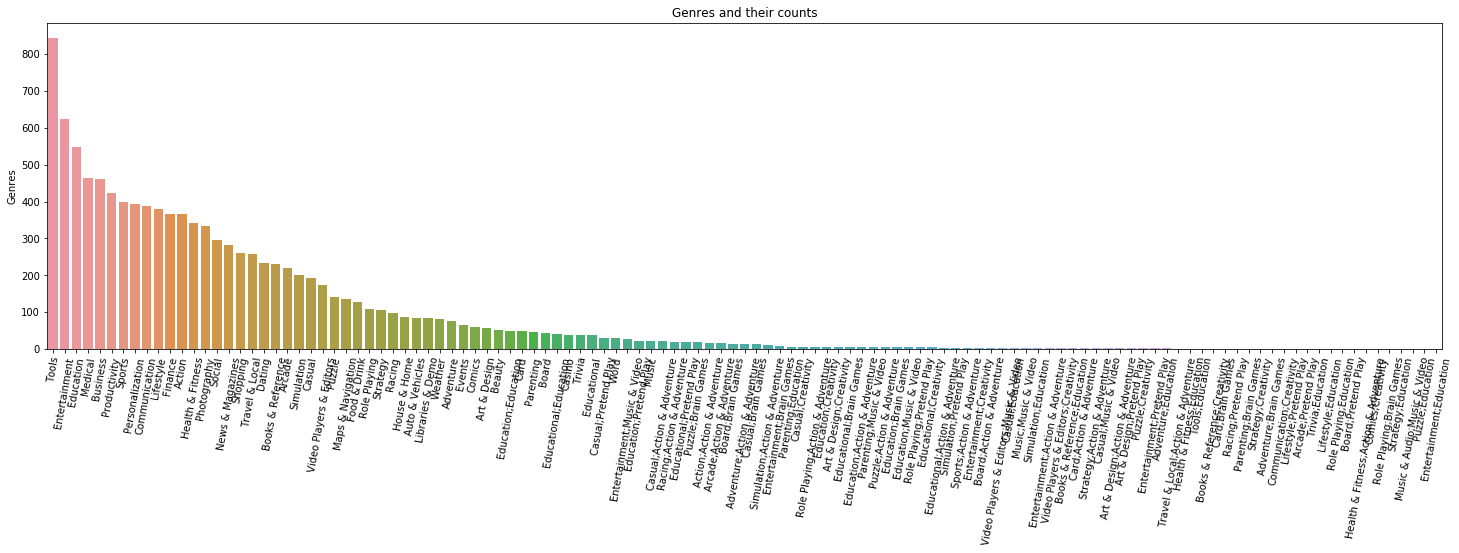

In [18]:
plt.figure(figsize=(25,6))
sns.barplot(x=df_dummy['Genres'].value_counts().index,y=df_dummy['Genres'].value_counts())
plt.xticks(rotation=80)
plt.title("Genres and their counts")
plt.show()

In [19]:
np.sort(df_dummy['Genres'].value_counts())

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   3,   3,   3,   3,   3,   3,
         3,   4,   4,   4,   5,   5,   5,   5,   5,   6,   6,   6,   7,
         7,   7,   7,   7,   8,  11,  13,  13,  15,  16,  17,  19,  19,
        20,  21,  22,  23,  27,  29,  31,  37,  38,  39,  41,  44,  46,
        48,  50,  53,  58,  59,  64,  75,  82,  85,  85,  88,  98, 106,
       109, 127, 137, 140, 173, 193, 200, 220, 231, 234, 257, 260, 283,
       295, 335, 341, 365, 366, 381, 387, 392, 398, 424, 460, 463, 549,
       623, 842], dtype=int64)

Some subcategories have very few examples. Therefore, I will classify those who do not have a significant number of examples as others.

In [20]:
df_dummy['Genres'].value_counts().index

Index(['Tools', 'Entertainment', 'Education', 'Medical', 'Business',
       'Productivity', 'Sports', 'Personalization', 'Communication',
       'Lifestyle',
       ...
       'Lifestyle;Education', 'Role Playing;Education', 'Board;Pretend Play',
       'Health & Fitness;Action & Adventure', 'Comics;Creativity',
       'Role Playing;Brain Games', 'Strategy;Education',
       'Music & Audio;Music & Video', 'Puzzle;Education',
       'Entertainment;Education'],
      dtype='object', length=119)

In [21]:
lists = []
for i in df_dummy['Genres'].value_counts().index:
    if df_dummy['Genres'].value_counts()[i] <20:
        lists.append(i)
        
print(len(lists),"genres contains too few (<20) sample ")        
df_dummy['Genres'] = ['Other' if i in lists else i for i in df_dummy['Genres']]        

65 genres contains too few (<20) sample 


In [22]:
df_dummy['Genres']=pd.Categorical(df_dummy['Genres'])
x = df_dummy['Genres']
del df_dummy['Genres']
dummies = pd.get_dummies(x,prefix = 'Genres')
df_dummy = pd.concat([df_dummy,dummies],axis=1)
df_dummy.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",1,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_dummy.shape

(10839, 96)

## 3. Content Rating 

This variable is ordinal.

In [24]:
#get unique values in Contant Rating feature 

df_dummy['Content Rating'].value_counts(dropna=False)

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [25]:
#object(string) values transform to ordinal in Content Rating Feature without nan
df = df_dummy.copy()

df['Content Rating'] = df['Content Rating'].map({'Unrated':0.0,
                                                 'Everyone':1.0,
                                                 'Everyone 10+':2.0,
                                                 'Teen':3.0,
                                                 'Adults only 18+':4.0,
                                                 'Mature 17+':5.0})
df['Content Rating'] = df['Content Rating'].astype(float)
df.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,159,19M,"10,000+",Free,0,1.0,"January 7, 2018",1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14M,"500,000+",Free,0,1.0,"January 15, 2018",1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8.7M,"5,000,000+",Free,0,1.0,"August 1, 2018",1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25M,"50,000,000+",Free,0,3.0,"June 8, 2018",1,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2.8M,"100,000+",Free,0,1.0,"June 20, 2018",1,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Reviews 

In [26]:
#change type to float
df2 = df.copy()
df2['Reviews'] = df2['Reviews'].astype(float)

## 5. Size

In [27]:
df2['Size'].value_counts()

Varies with device    1694
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
210k                     1
898k                     1
714k                     1
421k                     1
55k                      1
Name: Size, Length: 461, dtype: int64

In [28]:
#clean 'M','k', fill 'Varies with device' with median and transform to float

lists = []
for i in df2['Size']:
    if 'M' in i:
        i = float(i.replace('M',''))
        i = i *1000000
        lists.append(i)
    elif 'k' in i:
        i = float(i.replace('k',''))
        i = i *1000
        lists.append(i)
    else:
        lists.append('Unknown')

k = pd.Series(lists)
median = k[k!='Unknown'].median()
k = [median if i =='Unknown' else i for i in k]
df2['Size'] = k

del k,median,lists

In [29]:
#clean 'M'and transform to float 

print("Old",df['Size'][10],"New",df2['Size'][10])

Old 28M New 28000000.0


## 6. Price 

In [30]:
#clean '$' and transform to float 

df2['Price'] = [float(i.split('$')[1]) if '$' in i else float(0) for i in df2['Price']]


In [31]:
print("Old",df['Price'][9054],"New",df2['Price'][9054])

Old $2.99 New 2.99


## 7. Installs 

Clean '+' and ',' char. And transform object(string) to float.

In [32]:
df2['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [33]:
df2['Installs'] = [float(i.replace('+','').replace(',','')) if '+' in i or ',' in i else float(0) for i in df2['Installs']]

In [34]:
print("Old",df['Installs'][0],"New",df2['Installs'][0])

Old 10,000+ New 10000.0


## 8. Type

In [35]:
df2['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [36]:
df2['Type']  = df2['Type'].map({'Free':0,'Paid':1})

## 9. Last Updated 

In [37]:
df2['Last Updated'][:3]

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
Name: Last Updated, dtype: object

In [38]:
from datetime import datetime 
df3 = df2.copy()
df3['Last Updated'] = [datetime.strptime(i,'%B %d, %Y') for i in df3['Last Updated']]

In [39]:
df3 = df3.set_index('Last Updated')
df4 = df3.sort_index()
df4.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
Last Updated,,,,,,,,,,,,,,,,,,,,,
2010-05-21,4.2,1415.0,209000.0,100000.0,0,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-30,4.1,207.0,116000.0,50000.0,0,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-16,4.1,981.0,73000.0,100000.0,0,0.0,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2011-04-11,3.7,38767.0,4100000.0,5000000.0,0,0.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-04-16,4.0,387.0,1100000.0,50000.0,0,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Finish Tranformation

finally, lets check Nan

In [40]:
df4.isna().any().sum()

0

In [41]:
data =df4.copy()
data.shape

(10839, 95)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10839 entries, 2010-05-21 to 2018-08-08
Data columns (total 95 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              10839 non-null  float64
 1   Reviews                             10839 non-null  float64
 2   Size                                10839 non-null  float64
 3   Installs                            10839 non-null  float64
 4   Type                                10839 non-null  int64  
 5   Price                               10839 non-null  float64
 6   Content Rating                      10839 non-null  float64
 7   Category_ART_AND_DESIGN             10839 non-null  uint8  
 8   Category_AUTO_AND_VEHICLES          10839 non-null  uint8  
 9   Category_BEAUTY                     10839 non-null  uint8  
 10  Category_BOOKS_AND_REFERENCE        10839 non-null  uint8  
 11  Category_BUSINESS       

## Let's do real EDA on our data :) 

In [43]:
#additional libraries
from scipy.stats import norm 
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
style = sns.color_palette("ch:2.5,-.2,dark=.3")

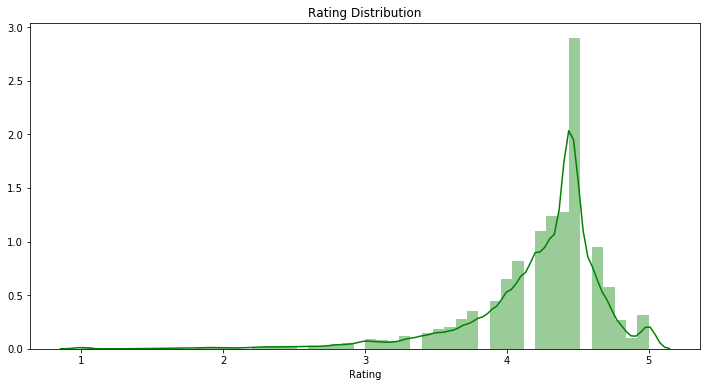

In [44]:
#histogram

plt.figure(figsize=(12,6))
sns.distplot(data['Rating'],color='g')

plt.title('Rating Distribution')
plt.show()

Apps generally have good rates.

In [45]:
#skewness and kurtosis

print('Skewness:',data['Rating'].skew())
print('Kurtosis:',data['Rating'].kurt())

Skewness: -2.0883865230805863
Kurtosis: 7.089656904207631


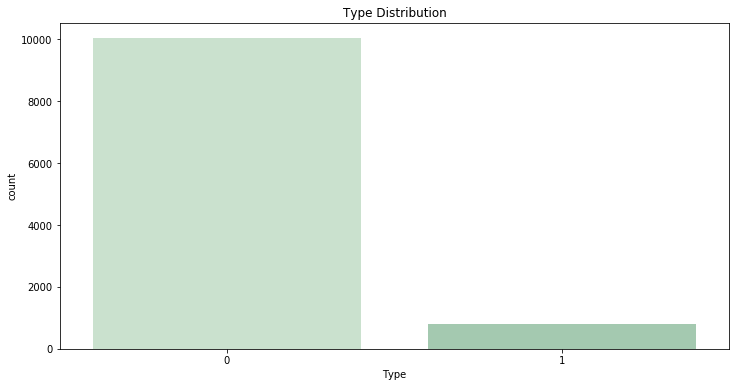

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(data['Type'],palette=style)

plt.title('Type Distribution')
plt.show()

The majority of apps in the market are free.

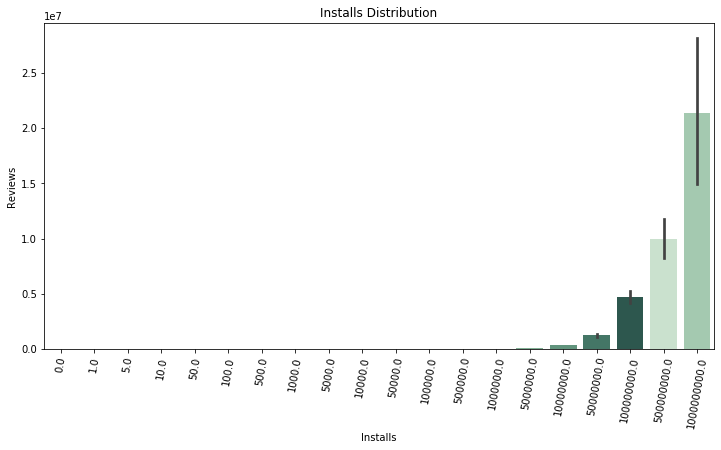

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['Installs'],y=data['Reviews'],color='b',palette=style)
plt.title('Installs Distribution')
plt.xticks(rotation=80)
plt.show()

We see that there are too many comments in applications that are downloaded too much.
We've already been waiting for this.

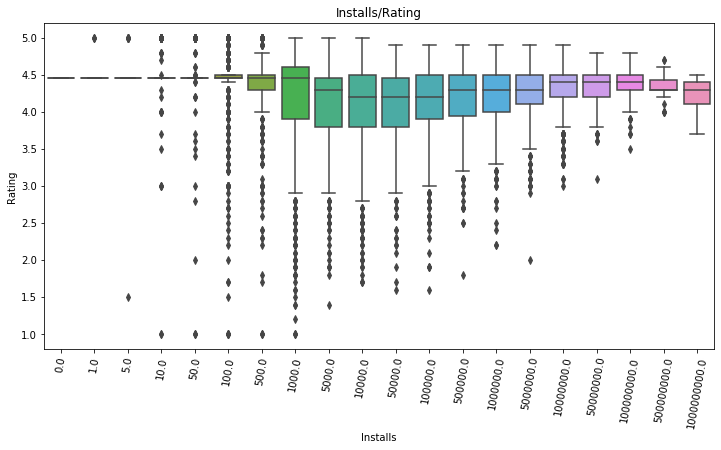

In [48]:
#boxplot plot installs/rates
plt.figure(figsize=(12,6))
sns.boxplot(x='Installs',y='Rating',data=data)
plt.title('Installs/Rating')
plt.xticks(rotation=80)
plt.show()

As Installs increases, we can see that Rating gets higher values.